# Time Series Forecasting with Python (ARIMA, LSTM, Prophet)

In [1]:
import numpy as np
import pandas as pd
import os
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
#from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

In this article we will try to forecast a time series data basically. We'll build three different model with Python and inspect their results. Models we will use are ARIMA (Autoregressive Integrated Moving Average), LSTM (Long Short Term Memory Neural Network) and Facebook Prophet. Let's jump in and start with ARIMA.

## ARIMA (Autoregressive Integrated Moving Average)

ARIMA is a model which is used for predicting future trends on a time series data. It is model that form of regression analysis. 
* **AR (Autoregression) :** Model that shows a changing variable that regresses on its own lagged/prior values.
* **I (Integrated) :**  Differencing of raw observations to allow for the time series to become stationary
* **MA (Moving average) :** Dependency between an observation and a residual error from a moving average model

For ARIMA models, a standard notation would be ARIMA with p, d, and q, where integer values substitute for the parameters to indicate the type of ARIMA model used.

* **p:** the number of lag observations in the model; also known as the lag order.
* **d:** the number of times that the raw observations are differenced; also known as the degree of differencing.
* **q:** the size of the moving average window; also known as the order of the moving average.

For more information about ARIMA you can check:
<br>
[What is ARIMA](https://www.quora.com/What-is-ARIMA)
<br>
[Autoregressive Integrated Moving Average (ARIMA)](https://www.investopedia.com/terms/a/autoregressive-integrated-moving-average-arima.asp)

## LSTM Neural Network

> LSTM stands for long short term memory. It is a model or architecture that extends the memory of recurrent neural networks. Typically, recurrent neural networks have ‘short term memory’ in that they use persistent previous information to be used in the current neural network. Essentially, the previous information is used in the present task. That means we do not have a list of all of the previous information available for the neural node.
> LSTM introduces long-term memory into recurrent neural networks. It mitigates the vanishing gradient problem, which is where the neural network stops learning because the updates to the various weights within a given neural network become smaller and smaller. It does this by using a series of ‘gates’. These are contained in memory blocks which are connected through layers, like this:

![](https://hub.packtpub.com/wp-content/uploads/2018/04/LSTM-696x494.png)

> LSTM work
There are three types of gates within a unit:
Input Gate: Scales input to cell (write)
Output Gate: Scales output to cell (read)
Forget Gate: Scales old cell value (reset)
Each gate is like a switch that controls the read/write, thus incorporating the long-term memory function into the model.

For more detail:
<br>
[What is LSTM?](https://hub.packtpub.com/what-is-lstm/)
<br>
[What is LSTM? - Quora](https://www.quora.com/What-is-LSTM)
<br>
[Wikipedia](https://en.wikipedia.org/wiki/Long_short-term_memory)

## Prophet

> Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

[Facebook's Prophet Web Page](https://facebook.github.io/prophet/)<br>
[Forecasting at Scale](https://peerj.com/preprints/3190.pdf)


# FORECAST

## Read Dataset

In [2]:
df = pd.read_csv('../input/monthly-beer-production-in-austr.csv')

In [3]:
df.head()

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
Month                      476 non-null object
Monthly beer production    476 non-null float64
dtypes: float64(1), object(1)
memory usage: 7.5+ KB


In [5]:
df.Month = pd.to_datetime(df.Month)

In [6]:
df = df.set_index("Month")
df.head()

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


In [7]:
df.index.freq = 'MS'

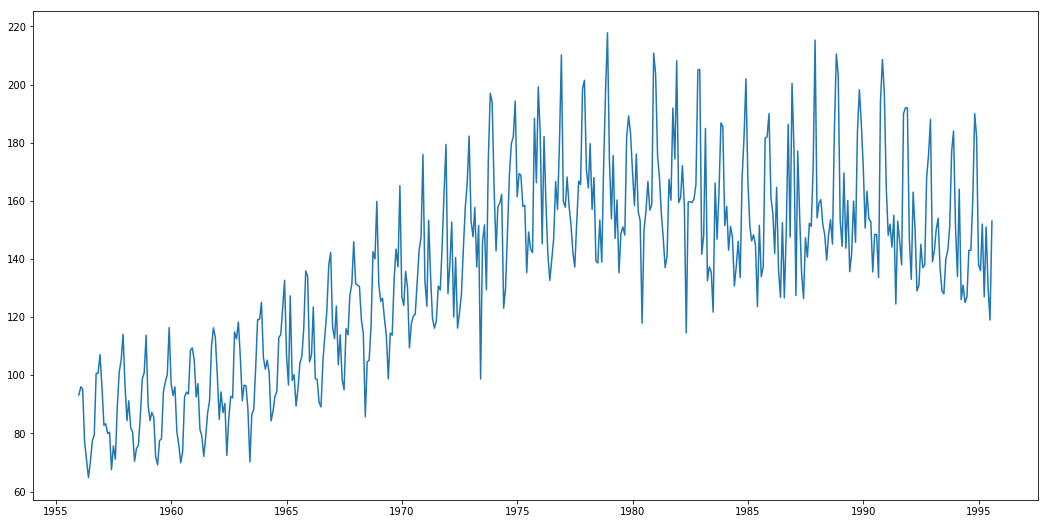

In [8]:
plt.figure(figsize=(18,9))
plt.plot(df.index, df["Monthly beer production"], linestyle="-")
plt.xlabel=('Dates')
plt.ylabel=('Total Production')
plt.show();

When we look at plot we can sey there is a seasonality in data. That's why we will use SARIMA (Seasonal ARIMA) instead of ARIMA.

> Seasonal ARIMA, is an extension of ARIMA that explicitly supports univariate time series data with a seasonal component.
> It adds three new hyperparameters to specify the autoregression (AR), differencing (I) and moving average (MA) for the seasonal component of the series, as well as an additional parameter for the period of the seasonality.

> There are four seasonal elements that are not part of ARIMA that must be configured; they are:<br>
**P:** Seasonal autoregressive order.<br>
**D:** Seasonal difference order.<br>
**Q:** Seasonal moving average order.<br>
**m:** The number of time steps for a single seasonal period.<br>

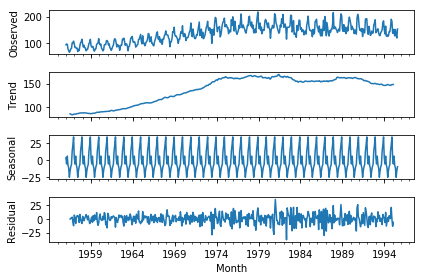

In [9]:
a = seasonal_decompose(df["Monthly beer production"], model = "add")
a.plot();

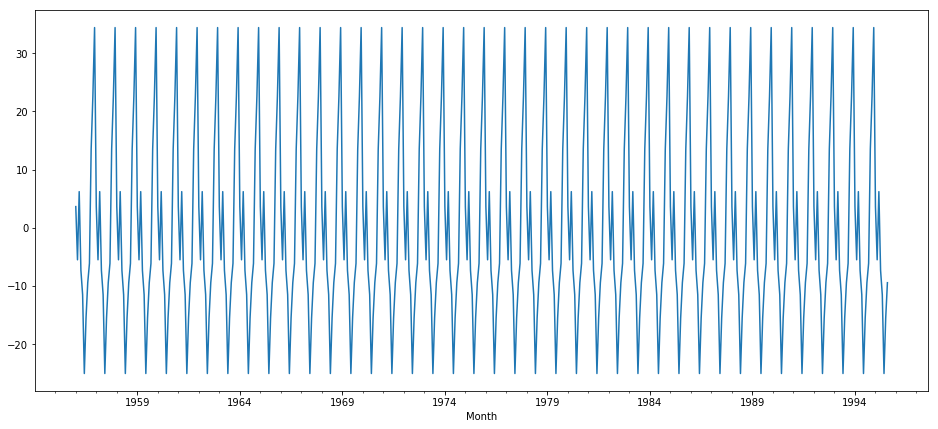

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,7))
a.seasonal.plot();

## ARIMA Forecast

Let's run auto_arima() function to get best p,d,q,P,D,Q values

In [11]:
#auto_arima(df['Monthly beer production'], seasonal=True, m=12,max_p=7, max_d=5,max_q=7, max_P=4, max_D=4,max_Q=4).summary()

As we can see best arima model chosen by auto_arima() is SARIMAX(2, 1, 1)x(4, 0, 3, 12)

**For some reason "pmdarima" wasn't installed at Kaggle. Thats's why I couldn't use "auto_arima()" here. But you can see same output below where "arima_model" defined.**

Let's split the data into train and test set

In [12]:
train_data = df[:len(df)-12]
test_data = df[len(df)-12:]

In [13]:
arima_model = SARIMAX(train_data['Monthly beer production'], order = (2,1,1), seasonal_order = (4,0,3,12))
arima_result = arima_model.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:            Monthly beer production   No. Observations:                  464
Model:             SARIMAX(2, 1, 1)x(4, 0, 3, 12)   Log Likelihood               -1708.067
Date:                            Sat, 22 Jun 2019   AIC                           3438.135
Time:                                    09:28:59   BIC                           3483.650
Sample:                                01-01-1956   HQIC                          3456.053
                                     - 08-01-1994                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1259      0.039     -3.270      0.001      -0.201      -0.050
ar.L2         -0.1737      0.047     -3.722      0.000      -0.265      -0.082
ma.L1         -0.8436      0.028    -30.241      0.000      -0.898      -0.789
ar.S.L12       1.7500      0.107     16.291      0.000       1.539       1.961
ar.S.L24      -1.5989      0.201     -7.954      0.000      -1.993      -1.205
ar.S.L36       0.7794      0.156      4.982      0.000       0.473       1.086
ar.S.L48       0.0683      0.058      1.174      0.241      -0.046       0.182
ma.S.L12      -1.5499      0.118    -13.122      0.000      -1.781      -1.318
ma.S.L24       1.3816      0.193      7.161      0.000       1.003       1.760
ma.S.L36      -0.6545      0.112     -5.851      0.000      -0.874      -0.435
sigma2        84.5434      4.921     17.181      0.000      74.899      94.188
===================================================================================
Ljung-Box (Q):                       92.69   Jarque-Bera (JB):                41.12
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.06   Skew:                            -0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

1994-09-01    133.943955
1994-10-01    157.814451
1994-11-01    181.865146
1994-12-01    183.541331
1995-01-01    144.902539
1995-02-01    136.857294
1995-03-01    151.136283
1995-04-01    133.214691
1995-05-01    137.923012
1995-06-01    120.564847
1995-07-01    128.439705
1995-08-01    138.819035
Freq: MS, Name: ARIMA Predictions, dtype: float64

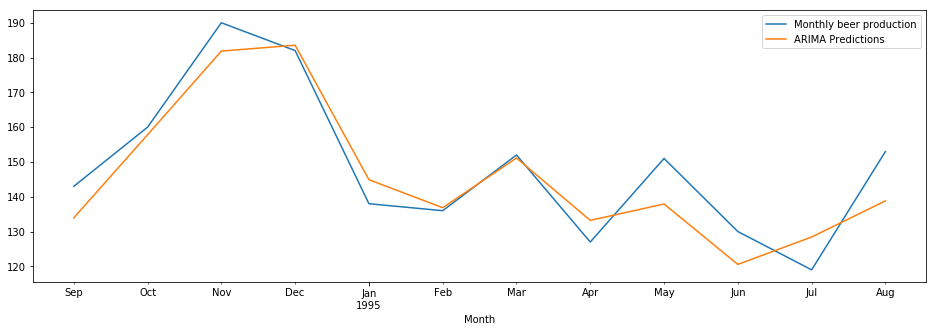

In [15]:
test_data['Monthly beer production'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

In [16]:
arima_rmse_error = rmse(test_data['Monthly beer production'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = df['Monthly beer production'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 66.11050409066426
RMSE Error: 8.13083661689646
Mean: 136.39537815126045


In [17]:
test_data['ARIMA_Predictions'] = arima_pred

## LSTM Forecast

First we'll scale our train and test data with MinMaxScaler

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [19]:
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

Before creating LSTM model we should create a Time Series Generator object.

In [20]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 12
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)

Using TensorFlow backend.


In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 200)               161600    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [22]:
lstm_model.fit_generator(generator,epochs=20)

Epoch 1/20
452/452 [==============================] - 7s 15ms/step - loss: 0.0254
Epoch 2/20
452/452 [==============================] - 6s 13ms/step - loss: 0.0155
Epoch 3/20
452/452 [==============================] - 6s 13ms/step - loss: 0.0102
Epoch 4/20
452/452 [==============================] - 6s 13ms/step - loss: 0.0085
Epoch 5/20
452/452 [==============================] - 6s 13ms/step - loss: 0.0085
Epoch 6/20
452/452 [==============================] - 6s 13ms/step - loss: 0.0070
Epoch 7/20
452/452 [==============================] - 6s 13ms/step - loss: 0.0073
Epoch 8/20
452/452 [==============================] - 6s 13ms/step - loss: 0.0080
Epoch 9/20
452/452 [==============================] - 6s 13ms/step - loss: 0.0074
Epoch 10/20
452/452 [==============================] - 6s 13ms/step - loss: 0.0077
Epoch 11/20
452/452 [==============================] - 6s 13ms/step - loss: 0.0072
Epoch 12/20
452/452 [==============================] - 6s 13ms/step - loss: 0.0070
Epoch 13/20
4

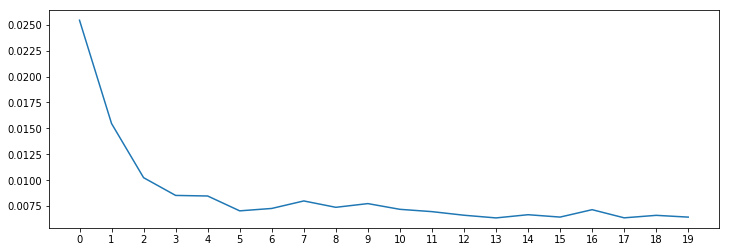

In [23]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

In [24]:
lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

As you know we scaled our data that's why we have to inverse it to see true predictions.

In [25]:
lstm_predictions_scaled

[array([0.46223804], dtype=float32),
 array([0.5305156], dtype=float32),
 array([0.6375334], dtype=float32),
 array([0.63648665], dtype=float32),
 array([0.47737443], dtype=float32),
 array([0.44606268], dtype=float32),
 array([0.5007994], dtype=float32),
 array([0.37402794], dtype=float32),
 array([0.3733862], dtype=float32),
 array([0.35970235], dtype=float32),
 array([0.3764071], dtype=float32),
 array([0.41531807], dtype=float32)]

In [26]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)

In [27]:
lstm_predictions

array([[135.52242066],
       [145.96888851],
       [162.34261422],
       [162.18245738],
       [137.83828847],
       [133.04759066],
       [141.42231088],
       [122.02627446],
       [121.92808925],
       [119.83445935],
       [122.39028429],
       [128.34366499]])

In [28]:
test_data['LSTM_Predictions'] = lstm_predictions

In [29]:
test_data

,Monthly beer production,ARIMA_Predictions,LSTM_Predictions
Month,,,
1994-09-01,143.0,133.943955,135.522421
1994-10-01,160.0,157.814451,145.968889
1994-11-01,190.0,181.865146,162.342614
1994-12-01,182.0,183.541331,162.182457
1995-01-01,138.0,144.902539,137.838288
1995-02-01,136.0,136.857294,133.047591
1995-03-01,152.0,151.136283,141.422311
1995-04-01,127.0,133.214691,122.026274
1995-05-01,151.0,137.923012,121.928089


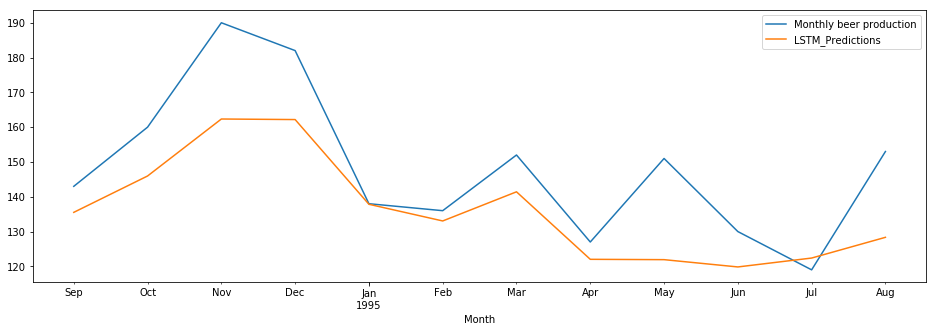

In [30]:
test_data['Monthly beer production'].plot(figsize = (16,5), legend=True)
test_data['LSTM_Predictions'].plot(legend = True);

In [31]:
lstm_rmse_error = rmse(test_data['Monthly beer production'], test_data["LSTM_Predictions"])
lstm_mse_error = lstm_rmse_error**2
mean_value = df['Monthly beer production'].mean()

print(f'MSE Error: {lstm_mse_error}\nRMSE Error: {lstm_rmse_error}\nMean: {mean_value}')

MSE Error: 260.3136404650557
RMSE Error: 16.134238143310508
Mean: 136.39537815126045


## Prophet Forecast

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 476 entries, 1956-01-01 to 1995-08-01
Freq: MS
Data columns (total 1 columns):
Monthly beer production    476 non-null float64
dtypes: float64(1)
memory usage: 7.4 KB


In [33]:
df_pr = df.copy()
df_pr = df.reset_index()

In [34]:
df_pr.columns = ['ds','y'] # To use prophet column names should be like that

In [35]:
train_data_pr = df_pr.iloc[:len(df)-12]
test_data_pr = df_pr.iloc[len(df)-12:]

In [36]:
from fbprophet import Prophet

In [37]:
m = Prophet()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=12,freq='MS')
prophet_pred = m.predict(future)

In [38]:
prophet_pred.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
471,1995-04-01,151.068031,130.656517,155.694446,151.026965,151.151344,-7.935845,-7.935845,-7.935845,-7.935845,-7.935845,-7.935845,0.0,0.0,0.0,143.132187
472,1995-05-01,151.003711,126.369051,152.227375,150.946272,151.116984,-11.400874,-11.400874,-11.400874,-11.400874,-11.400874,-11.400874,0.0,0.0,0.0,139.602837
473,1995-06-01,150.937247,114.754073,139.419418,150.853556,151.073215,-23.933819,-23.933819,-23.933819,-23.933819,-23.933819,-23.933819,0.0,0.0,0.0,127.003428
474,1995-07-01,150.872927,122.169338,147.501829,150.766473,151.042924,-15.749936,-15.749936,-15.749936,-15.749936,-15.749936,-15.749936,0.0,0.0,0.0,135.122992
475,1995-08-01,150.806464,128.744212,153.006680,150.680162,151.005109,-9.223559,-9.223559,-9.223559,-9.223559,-9.223559,-9.223559,0.0,0.0,0.0,141.582905


In [39]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-12:]['ds'], "Pred" : prophet_pred[-12:]["yhat"]})

In [40]:
prophet_pred = prophet_pred.set_index("Date")

In [41]:
prophet_pred.index.freq = "MS"

In [42]:
prophet_pred

,Pred
Date,
1994-09-01,145.014244
1994-10-01,166.010984
1994-11-01,173.651126
1994-12-01,185.899777
1995-01-01,155.190582
1995-02-01,146.743233
1995-03-01,158.839055
1995-04-01,143.132187
1995-05-01,139.602837


In [43]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values

In [44]:
import seaborn as sns

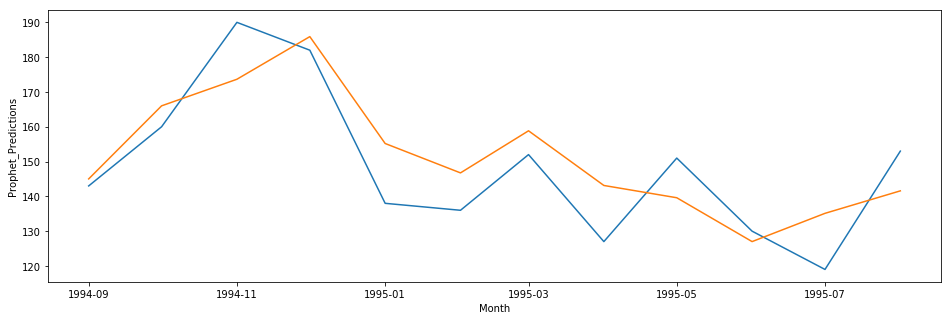

In [45]:
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data.index, y=test_data["Monthly beer production"])
sns.lineplot(x=test_data.index, y = test_data["Prophet_Predictions"]);

In [46]:
prophet_rmse_error = rmse(test_data['Monthly beer production'], test_data["Prophet_Predictions"])
prophet_mse_error = prophet_rmse_error**2
mean_value = df['Monthly beer production'].mean()

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMean: {mean_value}')

MSE Error: 130.81766824441812
RMSE Error: 11.437555169021836
Mean: 136.39537815126045


In [47]:
rmse_errors = [arima_rmse_error, lstm_rmse_error, prophet_rmse_error]
mse_errors = [arima_mse_error, lstm_mse_error, prophet_mse_error]
errors = pd.DataFrame({"Models" : ["ARIMA", "LSTM", "Prophet"],"RMSE Errors" : rmse_errors, "MSE Errors" : mse_errors})

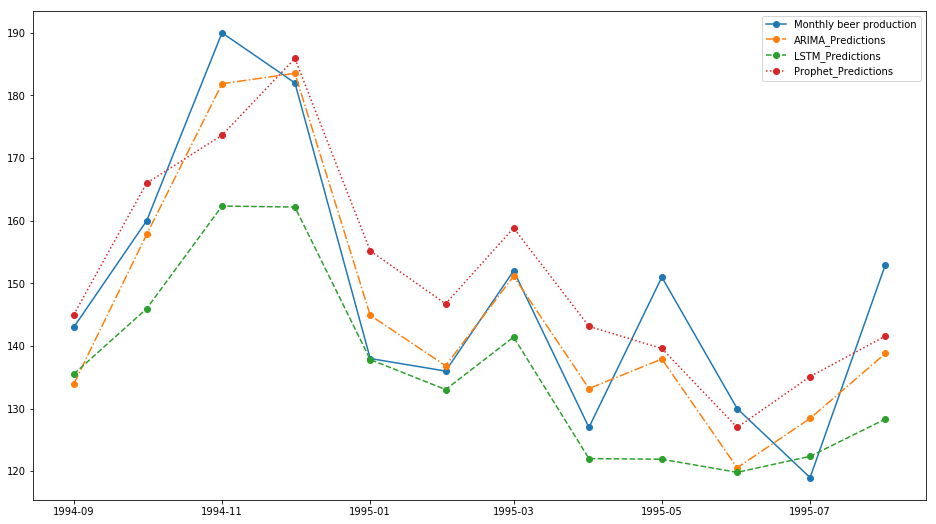

In [48]:
plt.figure(figsize=(16,9))
plt.plot_date(test_data.index, test_data["Monthly beer production"], linestyle="-")
plt.plot_date(test_data.index, test_data["ARIMA_Predictions"], linestyle="-.")
plt.plot_date(test_data.index, test_data["LSTM_Predictions"], linestyle="--")
plt.plot_date(test_data.index, test_data["Prophet_Predictions"], linestyle=":")
plt.legend()
plt.show()

In [49]:
print(f"Mean: {test_data['Monthly beer production'].mean()}")
errors

Mean: 148.41666666666666


,Models,RMSE Errors,MSE Errors
0,ARIMA,8.130837,66.110504
1,LSTM,16.134238,260.313640
2,Prophet,11.437555,130.817668


In [50]:
test_data

,Monthly beer production,ARIMA_Predictions,LSTM_Predictions,Prophet_Predictions
Month,,,,
1994-09-01,143.0,133.943955,135.522421,145.014244
1994-10-01,160.0,157.814451,145.968889,166.010984
1994-11-01,190.0,181.865146,162.342614,173.651126
1994-12-01,182.0,183.541331,162.182457,185.899777
1995-01-01,138.0,144.902539,137.838288,155.190582
1995-02-01,136.0,136.857294,133.047591,146.743233
1995-03-01,152.0,151.136283,141.422311,158.839055
1995-04-01,127.0,133.214691,122.026274,143.132187
1995-05-01,151.0,137.923012,121.928089,139.602837


Don't forget they are just quick and basic predictions so you can improve these models with tuning and according to your data and business knowledge.

<br>

Thanks!